In [87]:
! pip install networkx
! pip install plotly
! pip install colorlover

In [0]:
import networkx as nx
import pandas as pd
import collections
from collections import Counter
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [90]:
df.head()

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


In [0]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [92]:
hashTagsCounter.most_common(100)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

#Q2 Build a Mention Graph

In [0]:
teapartyTag = df[df["tweet"].str.lower().str.contains("#teaparty", na=False)].copy()

In [0]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
addMentionedColumn(teapartyTag)

In [96]:
teapartyTag.head(10)

,date,user,tweet,mentioned
13215,2009-06-11 17:16:03,macomber4,RT @exposeliberals: RIP Mr. Stephen Tyrone Joh...,[exposeliberals]
25520,2009-06-11 17:34:53,biasedgirl,RT @cole413 What sticky fingers you have #bern...,[cole413]
27447,2009-06-11 17:38:15,ginthegin,RT @HeyTammyBruce: The EPA seriously consideri...,[heytammybruce]
34299,2009-06-11 17:50:28,drewmckissick,"Join the ""Stop the Spending"" group on Facebook...",[]
36202,2009-06-11 17:53:18,rontmichel,How to Stop Socialized Health Care --Five argu...,[]
48244,2009-06-11 18:09:41,vannschaffner,RT @simonschuster RT @threshold_books: a tease...,"[simonschuster, threshold_books, glennbeck]"
55053,2009-06-11 18:20:04,socalsher,Is Google Purging Conservative News Sites? htt...,[]
68096,2009-06-11 18:44:01,linuslive,Holy smokes! #HR1207 has over 200 co-sponsors!...,[]
71256,2009-06-11 18:48:34,steveberen,6 things you can't say in #seattle http://bit....,"[heytammybruce, michellemalkin, libertbelle]"
71315,2009-06-11 18:48:38,christinajade,heh RT @meanolmeany: http://twitpic.com/74qrk ...,[meanolmeany]


In [0]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [0]:
teapartyGraph = mentionGraph(teapartyTag)

##Q2(a)

In [99]:
print("# nodes:", len(teapartyGraph.nodes()))
print("# edges:", len(teapartyGraph.edges()))

# nodes: 448
# edges: 488


##Q2(b)

In [0]:
degree = nx.degree(teapartyGraph,teapartyGraph.nodes())

Text(0.5, 0, 'Degree')

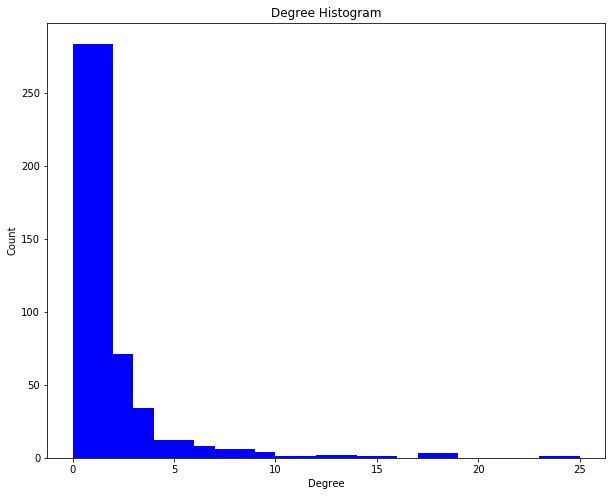

In [101]:
degree_sequence = sorted([d for n, d in degree()], reverse=True)  # degree sequence from largest to smallest
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(deg, cnt, width=2.0, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


## What can you learn from the degree distribution?


The degree distribution plot skewed heavily to the right. Most people mentioned only one account, a few accounts are mentioned by many people.

##Q2(c)

In [0]:
def EdgeWeight(graph):
    edgeList = []
    for node1, node2 in graph.edges():
        edgeList.append([node1, node2, graph[node1][node2]['numberMentions']])
    
    weight_df = pd.DataFrame(edgeList)
    weight_df.columns = ["Node 1", "Node 2", "Edge Weight"]
    return weight_df

In [103]:
EdgeWeight(teapartyGraph).sort_values(by=['Edge Weight'],ascending=False).head(5)

,Node 1,Node 2,Edge Weight
71,bobbi85710,tradingypsy,12
288,longevitycoach,libertyproject,9
63,tahdeetz,thekmgirl,4
90,teapartyprotest,johntremain,4
85,teapartyprotest,idrawrobots,4


##Q2(d)

In [104]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [0]:
addRandomPositions(teapartyGraph)

In [0]:
import colorlover as cl
from IPython.display import HTML

In [109]:
HTML(cl.to_html( cl.scales['9'] ))

In [110]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [0]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(teapartyGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [112]:
configure_plotly_browser_state()
plotNetworkSizeColor(teapartyGraph)

#Q3 Content Analysis

##Q3(a)

In [113]:
teapartyTag['tweet']

13215      RT @exposeliberals: RIP Mr. Stephen Tyrone Joh...
25520      RT @cole413 What sticky fingers you have #bern...
27447      RT @HeyTammyBruce: The EPA seriously consideri...
34299      Join the "Stop the Spending" group on Facebook...
36202      How to Stop Socialized Health Care --Five argu...
                                 ...                        
3430122    RT @JohnTremain I declared the Federal Governm...
3430123    RT @JohnTremain I declared the Federal Governm...
3435516    FLAG DAY 2009 http://bit.ly/4E6KLJ #tcot #hhrs...
3436075    Great explanation - THE CURRENT ECONOMIC CRISI...
3437508    Join the campaign to flood Congress with "Pink...
Name: tweet, Length: 685, dtype: object

In [114]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
stop = set(stopwords.words('english'))
stop.add('')
teapartyTweets = teapartyTag["tweet"].str.cat(sep=' ')
teapartytweetWords = [word.strip(""" ,.*()[]!@#$%^&*{}?'`"-""").lower() for word in teapartyTweets.split()]
teapartytweetWords_stop = [word for word in teapartytweetWords if word not in stop]
teapartyCounter = Counter(teapartytweetWords_stop)
teapartyCounter.most_common(50)

[('teaparty', 679),
 ('tcot', 567),
 ('rt', 447),
 ('tlot', 168),
 ('sgp', 147),
 ('912', 135),
 ('gop', 132),
 ('hhrs', 92),
 ('liberty', 58),
 ('2009-06-14', 53),
 ('obama', 49),
 ('tax', 44),
 ('tea', 43),
 ('houston', 41),
 ('pelosi', 41),
 ('protest', 41),
 ('party', 35),
 ('rush', 34),
 ('please', 34),
 ('new', 33),
 ('nra', 32),
 ('tporg', 31),
 ('bill', 29),
 ('c4l', 29),
 ('r3s', 29),
 ('video', 29),
 ('read', 28),
 ('clcs', 27),
 ('government', 26),
 ('tpp', 25),
 ('us', 25),
 ('plan', 25),
 ('r4liberty', 25),
 ('july', 24),
 ('iran', 23),
 ('real', 23),
 ('healthcare', 23),
 ('conservative', 22),
 ('right', 22),
 ('07:30:10', 22),
 ('live', 21),
 ('people', 21),
 ('2', 20),
 ('p2', 20),
 ('iranelection', 20),
 ('news', 19),
 ('revolution', 19),
 ('rnc', 18),
 ('via', 18),
 ('jdif', 17)]

##Analyze the most common words in all the tweets with the chosen hash-tag, and provide a basic description of the main themes.


tea party movement is called for lower txes, which is begun in 2009. The protests were part of the larger political tea party movement. The movement was focused on opposing efforts of the Obama Administration.

[The Tea Party movement is an American fiscally conservative political movement within the Republican Party. Members of the movement have called for lower taxes, and for a reduction of the national debt of the United States and federal budget deficit through decreased government spending.

The Tea Party protests were a series of protests throughout the United States that began in early 2009. The protests were part of the larger political Tea Party movement.[1] Most Tea Party activities have since been focused on opposing efforts of the Obama Administration, and on recruiting, nominating, and supporting candidates for state and national elections.[2][3] The name "Tea Party" is a reference to the Boston Tea Party, whose principal aim was to protest taxation without representation.]

##Q3(b)

In [0]:
def user_most_common(df):
  user_mostcommon_list = []
  for i in range(len(df['user'])):
    #user_mostcommon_words = []
    user = teapartyTag['user'].values[i]
    tweet = teapartyTag[teapartyTag['user']==user]['tweet'].str.cat(sep=' ')
    tweetword = [word.strip(""" ,.*()[]!@#$%^&*{}?'`"-""").lower() for word in tweet.split()]
    tweetword_stop = [word for word in tweetword if word not in stop]
    tweetCounter = Counter(tweetword_stop)
    #user_mostcommon_words.append(tweetCounter.most_common(3))
    #user_mostcommon_list.append(user_mostcommon_words)
    user_mostcommon_list.append(tweetCounter.most_common(3))
  return user_mostcommon_list

In [0]:
user_mostcommon_list = user_most_common(teapartyTag)

In [0]:
def plotNetworkSizeColor_hoverinfo(graph):
    closenessCentr = nx.closeness_centrality(teapartyGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    node_list = []
    for node in graph.nodes():
        node_list.append(node)
        idx = node_list.index(node)
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f " % (node, nodeCentr) + "\nThree most-common words: %s\n "%(user_mostcommon_list[idx]),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [140]:
configure_plotly_browser_state()
plotNetworkSizeColor_hoverinfo(teapartyGraph)

#Q4

##Q4(a)

In [120]:
nx.degree_centrality(teapartyGraph)

{'': 0.011185682326621923,
 '1950target': 0.011185682326621923,
 '2ndamndmntdfndr': 0.0022371364653243847,
 '304patriot': 0.017897091722595078,
 '3cc_community': 0.017897091722595078,
 '3cc_communityrt': 0.0022371364653243847,
 '45superman': 0.0044742729306487695,
 '912': 0.0022371364653243847,
 '912dc': 0.0044742729306487695,
 '_karenrose': 0.0022371364653243847,
 '_victor_': 0.0022371364653243847,
 'aboldstepback': 0.006711409395973154,
 'activistjane': 0.008948545861297539,
 'addthis': 0.0022371364653243847,
 'afpmissouri': 0.0044742729306487695,
 'ageofmastery': 0.0022371364653243847,
 'agoodeye': 0.0022371364653243847,
 'aithley': 0.0022371364653243847,
 'alfika': 0.0022371364653243847,
 'allaboutsher': 0.008948545861297539,
 'allahpundit': 0.0022371364653243847,
 'allapparel': 0.029082774049217,
 'allapparel)': 0.0022371364653243847,
 'allapparelrush': 0.0022371364653243847,
 'amandacarpenter': 0.0022371364653243847,
 'amandakathryn': 0.0022371364653243847,
 'amerikeith': 0.00223

In [121]:
nx.betweenness_centrality(teapartyGraph)

{'': 0.033293971783754164,
 '1950target': 0.01055469328109049,
 '2ndamndmntdfndr': 0.0,
 '304patriot': 0.04527423380238865,
 '3cc_community': 0.028640593095704908,
 '3cc_communityrt': 0.0,
 '45superman': 0.0,
 '912': 0.0,
 '912dc': 0.0,
 '_karenrose': 0.0,
 '_victor_': 0.0,
 'aboldstepback': 3.0096006259969303e-05,
 'activistjane': 0.025746567141366538,
 'addthis': 0.0,
 'afpmissouri': 0.0,
 'ageofmastery': 0.0,
 'agoodeye': 0.0,
 'aithley': 0.0,
 'alfika': 0.0,
 'allaboutsher': 4.61074000665297e-05,
 'allahpundit': 0.0,
 'allapparel': 0.03249485868274016,
 'allapparel)': 0.0,
 'allapparelrush': 0.0,
 'amandacarpenter': 0.0,
 'amandakathryn': 0.0,
 'amerikeith': 0.0,
 'amiablyme': 0.0,
 'anawakeamerican': 0.0,
 'angrywhitedude': 0.0,
 'aprilleb': 4.012800834662574e-05,
 'architekt010': 0.01228121152738577,
 'aretepraxis': 0.0,
 'artargenio': 0.0,
 'ashleymatt': 0.0,
 'asswm08': 0.0,
 'atlasshrugs': 0.0,
 'augustine25': 0.0,
 'bambenek': 1.0032002086656434e-05,
 "barackobama's": 0.0,
 '

##Q4(b)

In [0]:
def plotNetworkSizeColor_betweenness_centrality(graph):
    closenessCentr = nx.betweenness_centrality(teapartyGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    node_list = []
    for node in graph.nodes():
        node_list.append(node)
        idx = node_list.index(node)
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [123]:
configure_plotly_browser_state()
plotNetworkSizeColor_betweenness_centrality(teapartyGraph)

betweenness_centrality key players: teapartyprotest(0.186) ohio_tea_party(0.101) steveberen(0.078) toninobologny(0.051) tpo_hisself(0.041) 

In [0]:
def plotNetworkSizeColor_degree_centrality(graph):
    closenessCentr = nx.degree_centrality(teapartyGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    node_list = []
    for node in graph.nodes():
        node_list.append(node)
        idx = node_list.index(node)
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [125]:
configure_plotly_browser_state()
plotNetworkSizeColor_degree_centrality(teapartyGraph)

degree_centrality key players: teapartyprotest(0.054) toninobologny(0.040) steveberen(0.040) tpo_hisself(0.034) ohio_tea_party(0.031)

##Q4(c)

1. Are the results similar or different? Explain what can be the reason for the observed similarity or difference.


The results of gorup of key players obtained from both centrality measures are the same overall, but in different orders. This is because in this network, there are not many strongly connected components, so the nodes with high degree also act as a common bridge for many nodes.


2. What centrality measure produced a more meaningful interpretation? Why?

Betweenness centrality measure is a more meaningful interpretation. Because closeness measure is difficult to identify the major players with as many nodes had similar centrality values, while degree centrality is also useful, but there are more smaller cliques of users, which are connected by the major users.

#Q5

##Q5(a)
###1.Number of maximal cliques in your graph


In [126]:
print("Number of Maximal cliques: {0}".format(len([clique for clique in nx.find_cliques(teapartyGraph)])))

Number of Maximal cliques: 417


###2.The graph’s clique number (size of the largest clique in the graph)


In [127]:
print("Graph's clique number: {0}".format(nx.graph_clique_number(teapartyGraph)))

Graph's clique number: 4


###3.Number of maximal cliques for each node

In [128]:
pd.DataFrame(list(nx.number_of_cliques(teapartyGraph).items()), 
             columns=['user', 'Maximal clique']).sort_values('Maximal clique',ascending=0)

,user,Maximal clique
213,toninobologny,18
31,teapartyprotest,18
10,steveberen,16
6,vannschaffner,15
113,tpo_hisself,14
...,...,...
192,freddygden,1
190,johnbeagle,1
189,libertyproject,1
188,atlasshrugs,1


###4.Size of the largest maximal clique containing each given node


In [129]:
pd.DataFrame(list(nx.node_clique_number(teapartyGraph).items()), 
             columns=['user', 'Maximal clique']).sort_values('Maximal clique',ascending=0)

,user,Maximal clique
217,msbeeee,4
361,callmeextreme,4
362,change_for_iran,4
364,jillme,4
124,saintsince67,3
...,...,...
168,claytoncalhoon,2
167,coutpost,2
166,jimacoburn,2
447,richspeer,2


##Q5(b)




Based on the above values, the largest clieque is teapartyprotest, toninobologny with clique value of 18. This network has a lot of cliques, but they are all small. Majority of users are small groups of friends, the key players are probably organizaitons.